In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data process
#ing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import Data**

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# Define the general path
path = '../input/chest-xray-pneumoniacovid19tuberculosis/'

# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    classes=['NORMAL','PNEUMONIA','TURBERCULOSIS'],
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=1234)

valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    color_mode="grayscale",
                                                    classes=['NORMAL','PNEUMONIA','TURBERCULOSIS'],
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=1234)


test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  color_mode="grayscale",
                                                  classes=['NORMAL','PNEUMONIA','TURBERCULOSIS'],
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=1234)

Found 5866 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 665 images belonging to 3 classes.


From the results above, it shows all images were read from the train, val and test folder. It recognize that there are a total of four different classes within train, val and test, which is the patient is normal or has pneumonia or tuberculosis. There are a total of 5866 images in the train folder, 28 images in the val folder and 665 images in the test folder.

# **CNN**

In [9]:
model= Sequential()

model.add(Conv2D(filters=128,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(224,224,1,)))
model.add(MaxPool2D(3,3))

model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=25,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))

model.add(Dropout(.1))

model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dropout(.1))

model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 128)     3328      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 64)        204864    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 30)        17310     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 30)      

# **Train CNN on Train Dataset**

In [10]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
# Stop the training when there is no improvement after 3 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=25, callbacks=early_stop)

Epoch 1/25
183/183 [==============================] - 124s 604ms/step - loss: 0.7282 - accuracy: 0.6985
Epoch 2/25
183/183 [==============================] - 63s 343ms/step - loss: 0.4422 - accuracy: 0.8318
Epoch 3/25
183/183 [==============================] - 62s 340ms/step - loss: 0.2740 - accuracy: 0.9028
Epoch 4/25
183/183 [==============================] - 63s 342ms/step - loss: 0.2109 - accuracy: 0.9225
Epoch 5/25
183/183 [==============================] - 63s 341ms/step - loss: 0.1524 - accuracy: 0.9462
Epoch 6/25
183/183 [==============================] - 62s 336ms/step - loss: 0.1433 - accuracy: 0.9457
Epoch 7/25
183/183 [==============================] - 62s 340ms/step - loss: 0.1229 - accuracy: 0.9570
Epoch 8/25
183/183 [==============================] - 62s 339ms/step - loss: 0.0997 - accuracy: 0.9647
Epoch 9/25
183/183 [==============================] - 62s 340ms/step - loss: 0.0934 - accuracy: 0.9643
Epoch 10/25
183/183 [==============================] - 62s 340ms/step - 

# **Predictions**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

665/665 [==============================] - 12s 17ms/step


In [13]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/771
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 67.57%.


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

               precision    recall  f1-score   support

       NORMAL       0.94      0.42      0.58       234
    PNEUMONIA       0.78      0.98      0.87       390
TURBERCULOSIS       0.57      0.93      0.70        41

     accuracy                           0.78       665
    macro avg       0.76      0.78      0.72       665
 weighted avg       0.82      0.78      0.76       665



# **Data Visualisation**

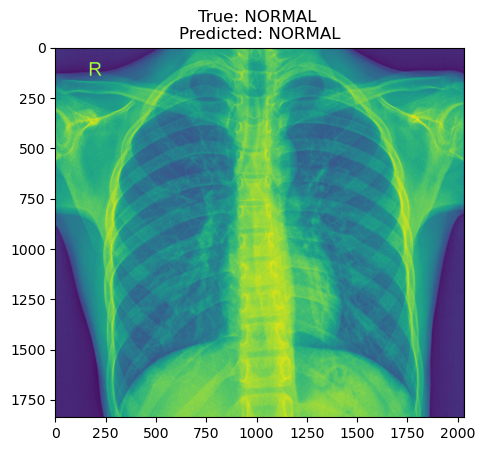

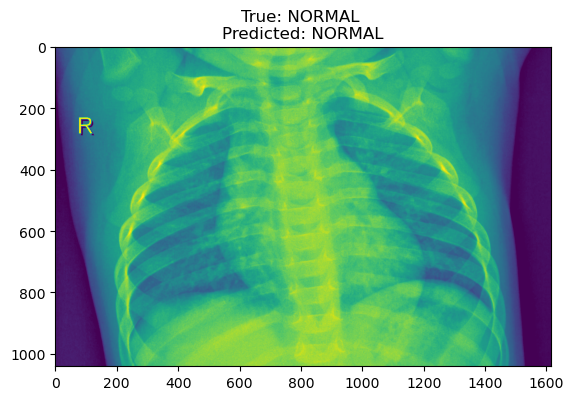

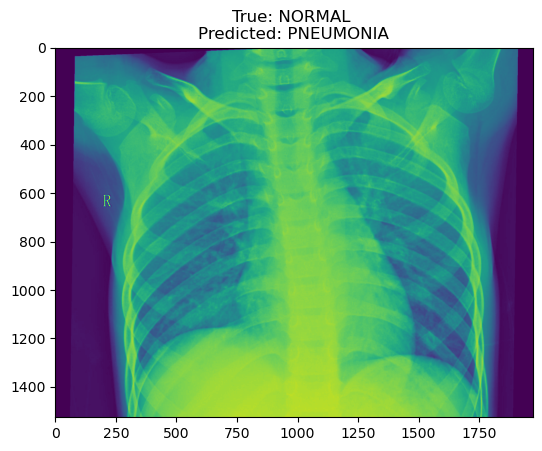

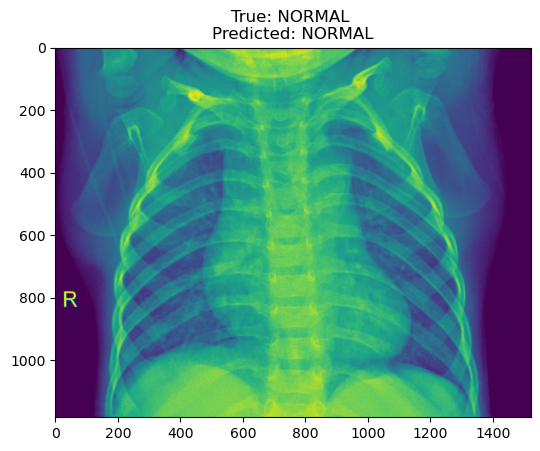

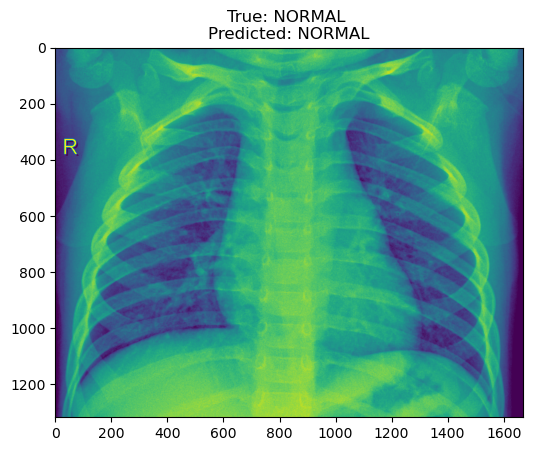

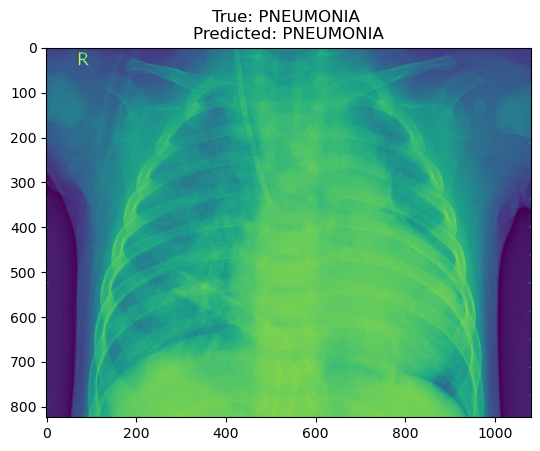

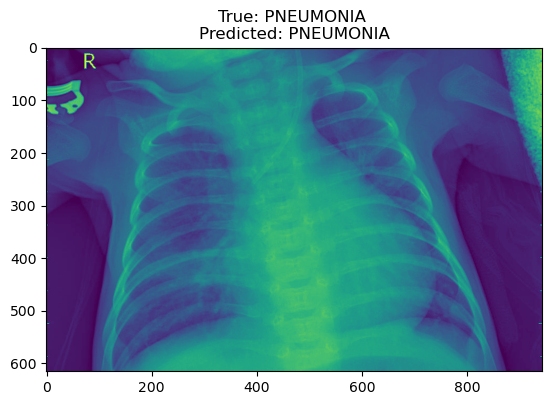

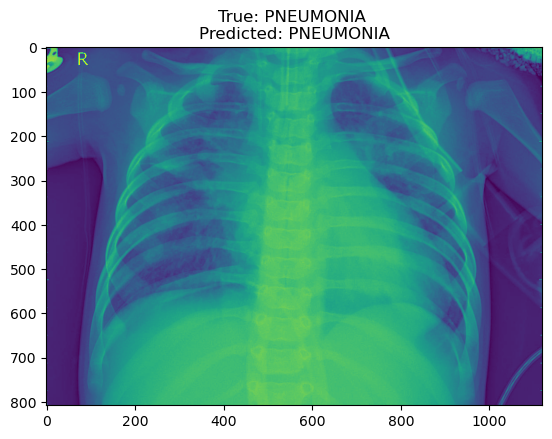

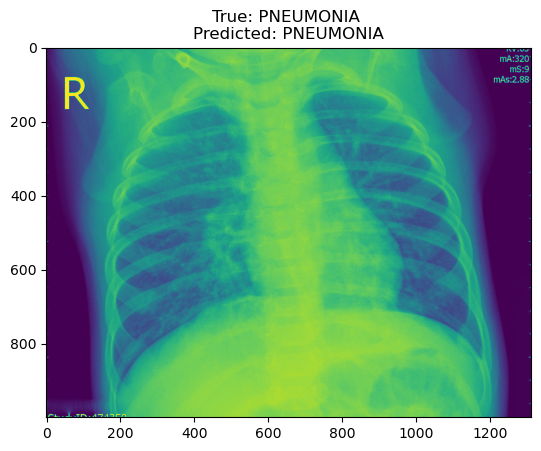

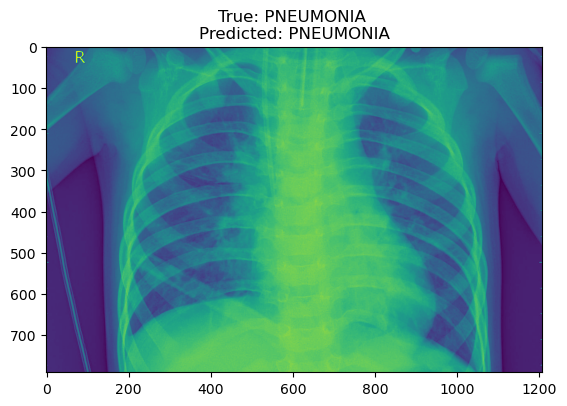

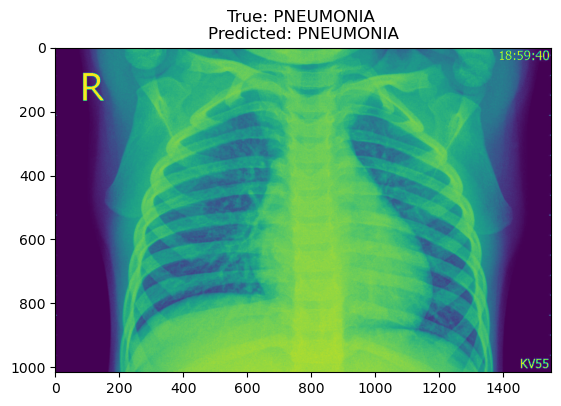

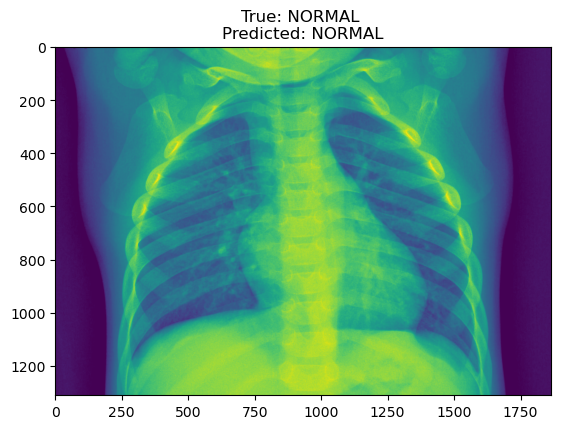

In [16]:
current = [2,37,103,189,203,274,333,375,435,478,511,58]
for i in current: 
    plt.imshow(plt.imread(path+'test/'+test_generator.filenames[i]))
    string = test_generator.filenames[i]
    substr = '/'
    actual = string[:string.find(substr)]
    plt.title(f"True: {actual} \nPredicted: {predictions[i]}")
    plt.show()

# **Save Model**

In [17]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import gradio as gr

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def lung_defect(img):
    img = img.reshape(-1, 224, 224, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = list(iter(train_generator.class_indices))
    return {class_names[i]: prediction[i] for i in range(3)}
#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gr.inputs.Image(shape=(224, 224), image_mode='L', invert_colors=False, source="upload")
#setup the interface
iface = gr.Interface(
    fn = lung_defect, 
    inputs = im, 
    outputs = gr.outputs.Label(),
)
iface.launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a7b27d86147e925fea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 21ms/step
